In [1]:
#Addtional packages to install not included in default Colab environment. Please run this command if you have not already.

!pip install python-steam-api

#NOTE: If you ever receive the "list index out of range" error, then it means the information is probably being updated on Steam's end. Wait 5-10 minutes and try again.

In [2]:
#Package imports handled here

import os
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from steam_web_api import Steam
from collections import Counter
from google.colab import drive
drive.mount('/content/drive')

#API Keys declared here as string variables

steam_api_key = "7306FA146AE2C55246B3A3F83859D528"

Mounted at /content/drive


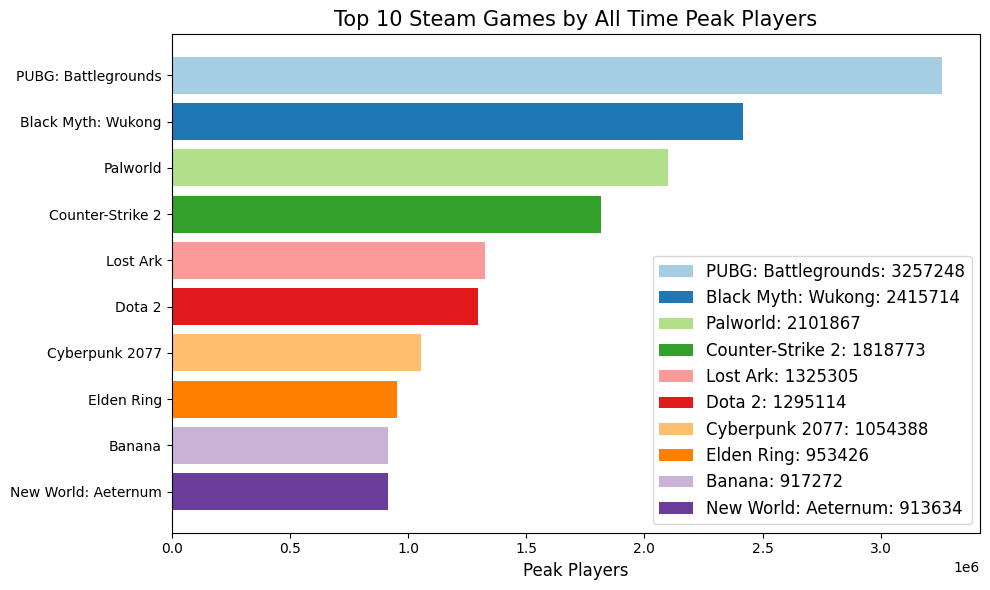

In [ ]:
steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:10]]

game_names = ['PUBG: Battlegrounds', 'Black Myth: Wukong', 'Palworld', 'Counter-Strike 2', 'Lost Ark', 'Dota 2', 'Cyberpunk 2077', 'Elden Ring', 'Banana', 'New World: Aeternum']
peak_players = [3257248, 2415714, 2101867, 1818773, 1325305, 1295114, 1054388, 953426, 917272, 913634]

game_names_24h = []
peak_players_24h  = []

'''
for app_id, peak_all in top_50:
    app_details = steam.apps.search_games(str(app_id))
    game_name = app_details['apps'][0]['name']
    game_names_24h.append(game_name)
    peak_players_24h.append(peak_all)
'''

plt.figure(figsize=(10, 6))

bars = plt.barh(game_names, peak_players, color=plt.cm.Paired.colors[:len(game_names)])

plt.legend(bars, [f"{game_name}: {peak_player}" for game_name, peak_player in zip(game_names, peak_players)], fontsize=12)

#plt.xlim(0, 1.6e6)
plt.xlabel('Peak Players', fontsize=12)
plt.title('Top 10 Steam Games by All Time Peak Players', fontsize=15)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig("top_50_games_24h.png")
plt.show()

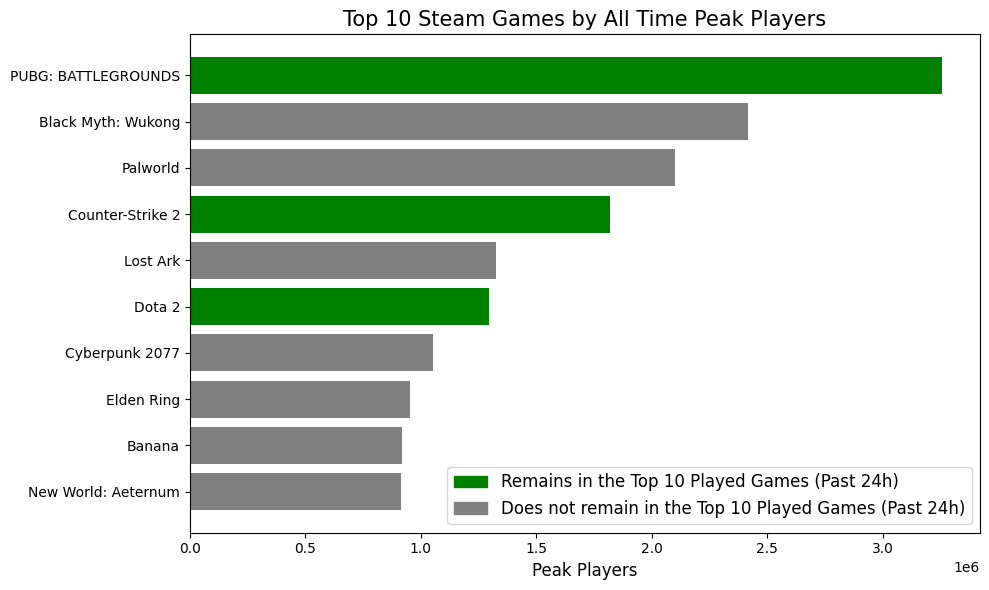

In [ ]:
steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:10]]

game_names = ['PUBG: BATTLEGROUNDS', 'Black Myth: Wukong', 'Palworld', 'Counter-Strike 2', 'Lost Ark', 'Dota 2', 'Cyberpunk 2077', 'Elden Ring', 'Banana', 'New World: Aeternum']
peak_players = [3257248, 2415714, 2101867, 1818773, 1325305, 1295114, 1054388, 953426, 917272, 913634]

game_names_24h = []
peak_players_24h  = []

for app_id, peak_all in top_50:
    app_details = steam.apps.search_games(str(app_id))
    game_name = app_details['apps'][0]['name']
    game_names_24h.append(game_name)
    peak_players_24h.append(peak_all)

import matplotlib.pyplot as plt

overlapping_games = set(game_names).intersection(set(game_names_24h))

bar_colors = ['green' if game in overlapping_games else 'gray' for game in game_names]

plt.figure(figsize=(10, 6))

bars = plt.barh(game_names, peak_players, color=bar_colors)

legend_colors = ['green', 'gray']
legend_labels = ['Remains in the Top 10 Played Games (Past 24h)', 'Does not remain in the Top 10 Played Games (Past 24h)']
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors],
           labels=legend_labels, fontsize=12)

plt.xlabel('Peak Players', fontsize=12)
plt.title('Top 10 Steam Games by All Time Peak Players', fontsize=15)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig("top_50_games_24h.png")
plt.show()


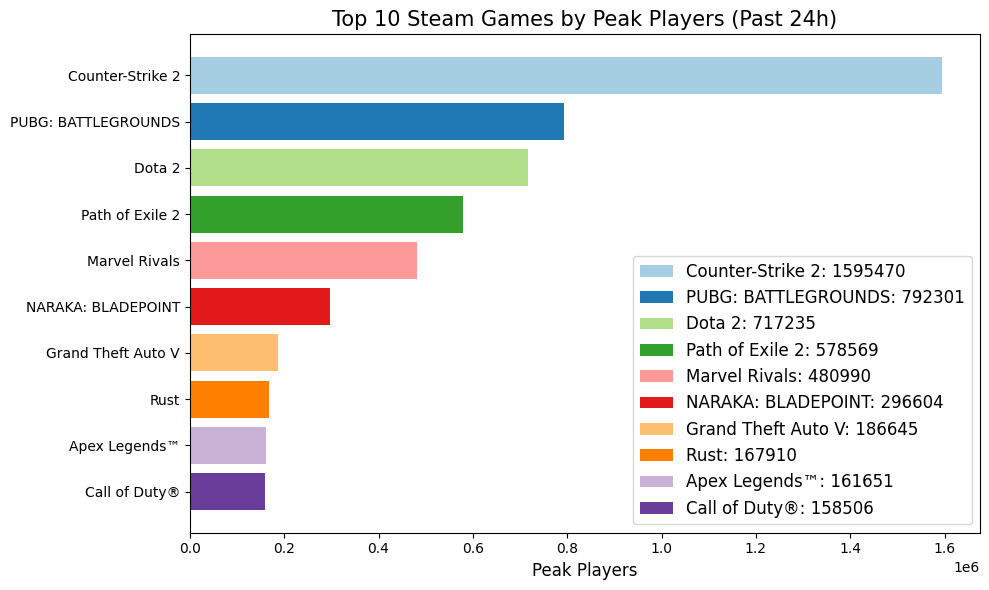

In [ ]:
steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:10]]

game_names = []
peak_players = []

for app_id, peak_all in top_50:
    app_details = steam.apps.search_games(str(app_id))
    game_name = app_details['apps'][0]['name']
    game_names.append(game_name)
    peak_players.append(peak_all)

plt.figure(figsize=(10, 6))

bars = plt.barh(game_names, peak_players, color=plt.cm.Paired.colors[:len(game_names)])

plt.legend(bars, [f"{game_name}: {peak_player}" for game_name, peak_player in zip(game_names, peak_players)], fontsize=12)

#plt.xlim(0, 1.6e6)
plt.xlabel('Peak Players', fontsize=12)
plt.title('Top 10 Steam Games by Peak Players (Past 24h)', fontsize=15)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig("top_50_games_24h.png")
plt.show()

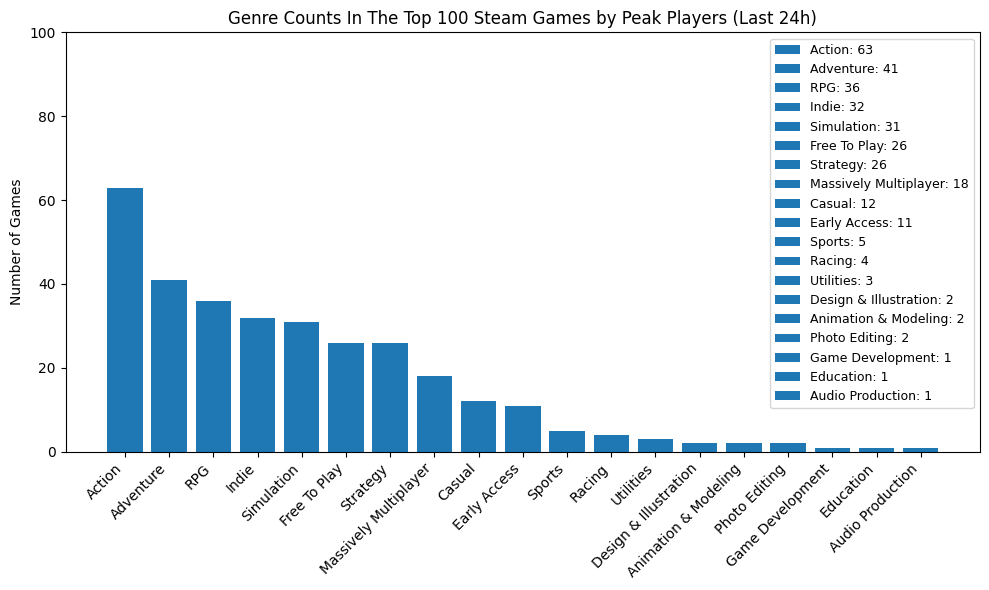

In [ ]:
steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:100]]

genres = []

for app_id, _ in top_50:
    app_details = steam.apps.get_app_details(str(app_id), filters='genres')
    genre_list = app_details[str(app_id)]['data']['genres']
    for genre in genre_list:
        genres.append(genre['description'])

genre_counts = {genre: genres.count(genre) for genre in set(genres)}
genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_counts = dict(genre_counts)

plt.figure(figsize=(10, 6))

bars = plt.bar(genre_counts.keys(), genre_counts.values())
#Use this statement instead for colored bars
#bars = ax.bar(genre_counts.keys(), genre_counts.values(), color=plt.cm.Paired.colors[:len(genre_counts)])

legend_labels = [f"{genre}: {count}" for genre, count in genre_counts.items()]

plt.legend(bars, legend_labels, fontsize=9)

plt.gca().set_xticks(range(len(genre_counts)))
plt.gca().set_xticklabels(genre_counts.keys(), rotation=45, ha='right')

plt.gca().set_ylabel('Number of Games')
plt.gca().set_ylim(0, 100)
plt.title('Genre Counts In The Top 100 Steam Games by Peak Players (Last 24h)')

plt.tight_layout()
plt.savefig("top_50_genres_24h.png")
plt.show()

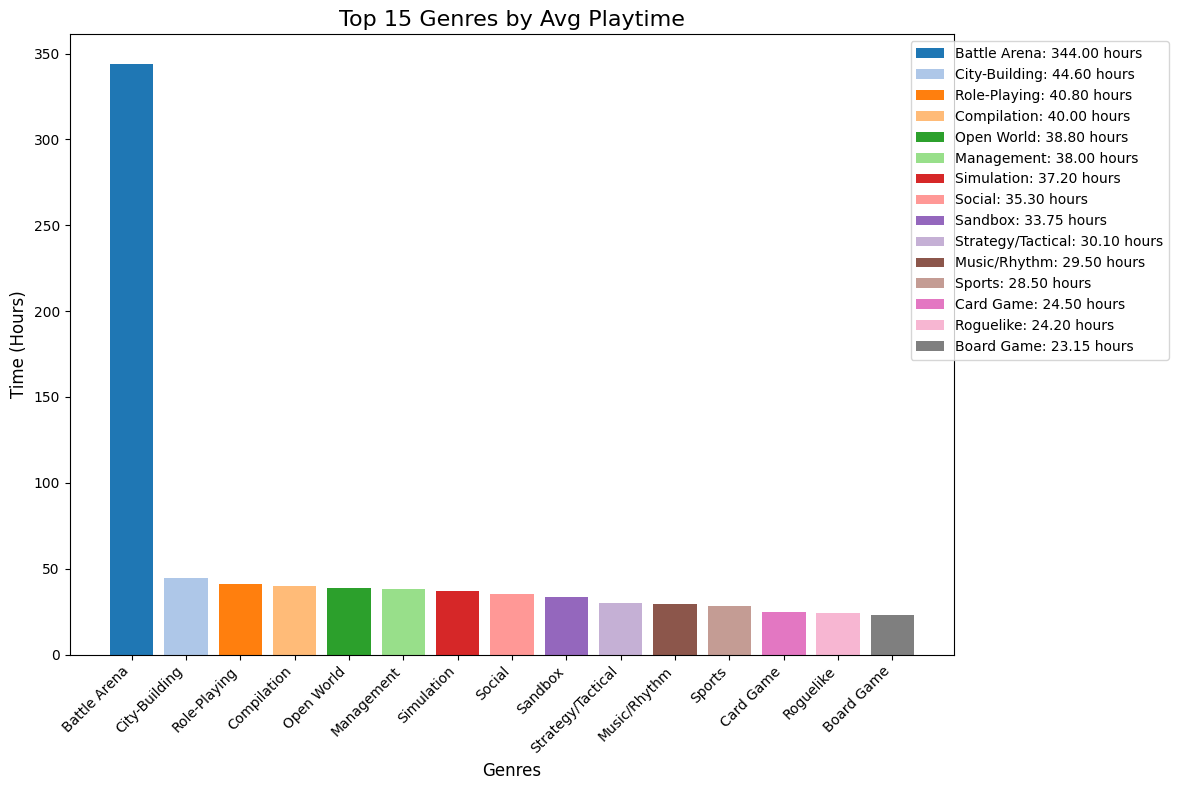

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Data
genres = [
    "Action", "Adventure", "Arcade", "Battle Arena", "Beat em Up", "Board Game", "Card Game",
    "City-Building", "Compilation", "Educational", "Fighting", "Fitness", "Flight",
    "Full Motion Video (FMV)", "Hack and Slash", "Horror", "Interactive Art", "Management",
    "Music/Rhythm", "Open World", "Party", "Pinball", "Platform", "Puzzle", "Racing/Driving",
    "Roguelike", "Role-Playing", "Sandbox", "Shooter", "Simulation", "Social", "Sports",
    "Stealth", "Strategy/Tactical", "Survival", "Tower Defense", "Trivia", "Vehicular Combat",
    "Visual Novel"
]
values = [
    20.5, 11.3, 6.5, 344, 8.5, 23.15, 24.5, 44.6, 40, 3.6, 10, 22.5, 20.1, 6, 21.86, 8.3, 12.25,
    38, 29.5, 38.8, 10, 7.6, 8.2, 8.4, 19.75, 24.2, 40.8, 33.75, 14.75, 37.2, 35.3, 28.5, 18.6,
    30.1, 18.2, 20.1, 3.7, 11.5, 15.8
]

# Sort data by values in descending order
sorted_data = sorted(zip(values, genres), reverse=True)
sorted_values, sorted_genres = zip(*sorted_data)

# Use only the top 15 genres
top_15_values = sorted_values[:15]
top_15_genres = sorted_genres[:15]

# Generate unique colors for the bars
colors = cm.tab20(range(len(top_15_genres)))  # Use a larger colormap for more unique colors

# Create the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
bars = plt.bar(top_15_genres, top_15_values, color=colors)  # Assign unique colors to each bar

# Add labels and title
plt.xlabel('Genres', fontsize=12)  # X-axis label
plt.ylabel('Time (Hours)', fontsize=12)  # Y-axis label
plt.title('Top 15 Genres by Avg Playtime', fontsize=16)  # Title
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability

# Add a legend with values included
legend_labels = [f"{genre}: {value:.2f} hours" for genre, value in zip(top_15_genres, top_15_values)]
plt.legend(bars, legend_labels, fontsize=10, loc='upper right', bbox_to_anchor=(1.25, 1))

# Optimize layout and show the plot
plt.tight_layout()
plt.show()

{'apps': [{'id': [730], 'link': 'https://store.steampowered.com/app/730/CounterStrike_2/?snr=1_7_15__13', 'name': 'Counter-Strike 2', 'img': 'https://shared.fastly.steamstatic.com/store_item_assets/steam/apps/730/capsule_sm_120.jpg?t=1729703045', 'price': 'Free To Play'}, {'id': [1106100], 'link': 'https://store.steampowered.com/app/1106100/EARTH_DEFENSE_FORCE_IRON_RAIN__Energy_Gems__Credits_Type73000/?snr=1_7_15__13', 'name': 'EARTH DEFENSE FORCE: IRON RAIN - Energy Gems & Credits "Type73000"', 'img': 'https://shared.fastly.steamstatic.com/store_item_assets/steam/apps/1106100/capsule_sm_120.jpg?t=1721985865', 'price': '$2.99'}]}
{'apps': [{'id': [578080], 'link': 'https://store.steampowered.com/app/578080/PUBG_BATTLEGROUNDS/?snr=1_7_15__13', 'name': 'PUBG: BATTLEGROUNDS', 'img': 'https://shared.fastly.steamstatic.com/store_item_assets/steam/apps/578080/72361ae79b439e83e17445e5d9ab3fab7aba8a60/capsule_sm_120.jpg?t=1733275088', 'price': 'Free To Play'}]}
{'apps': [{'id': [570], 'link': 

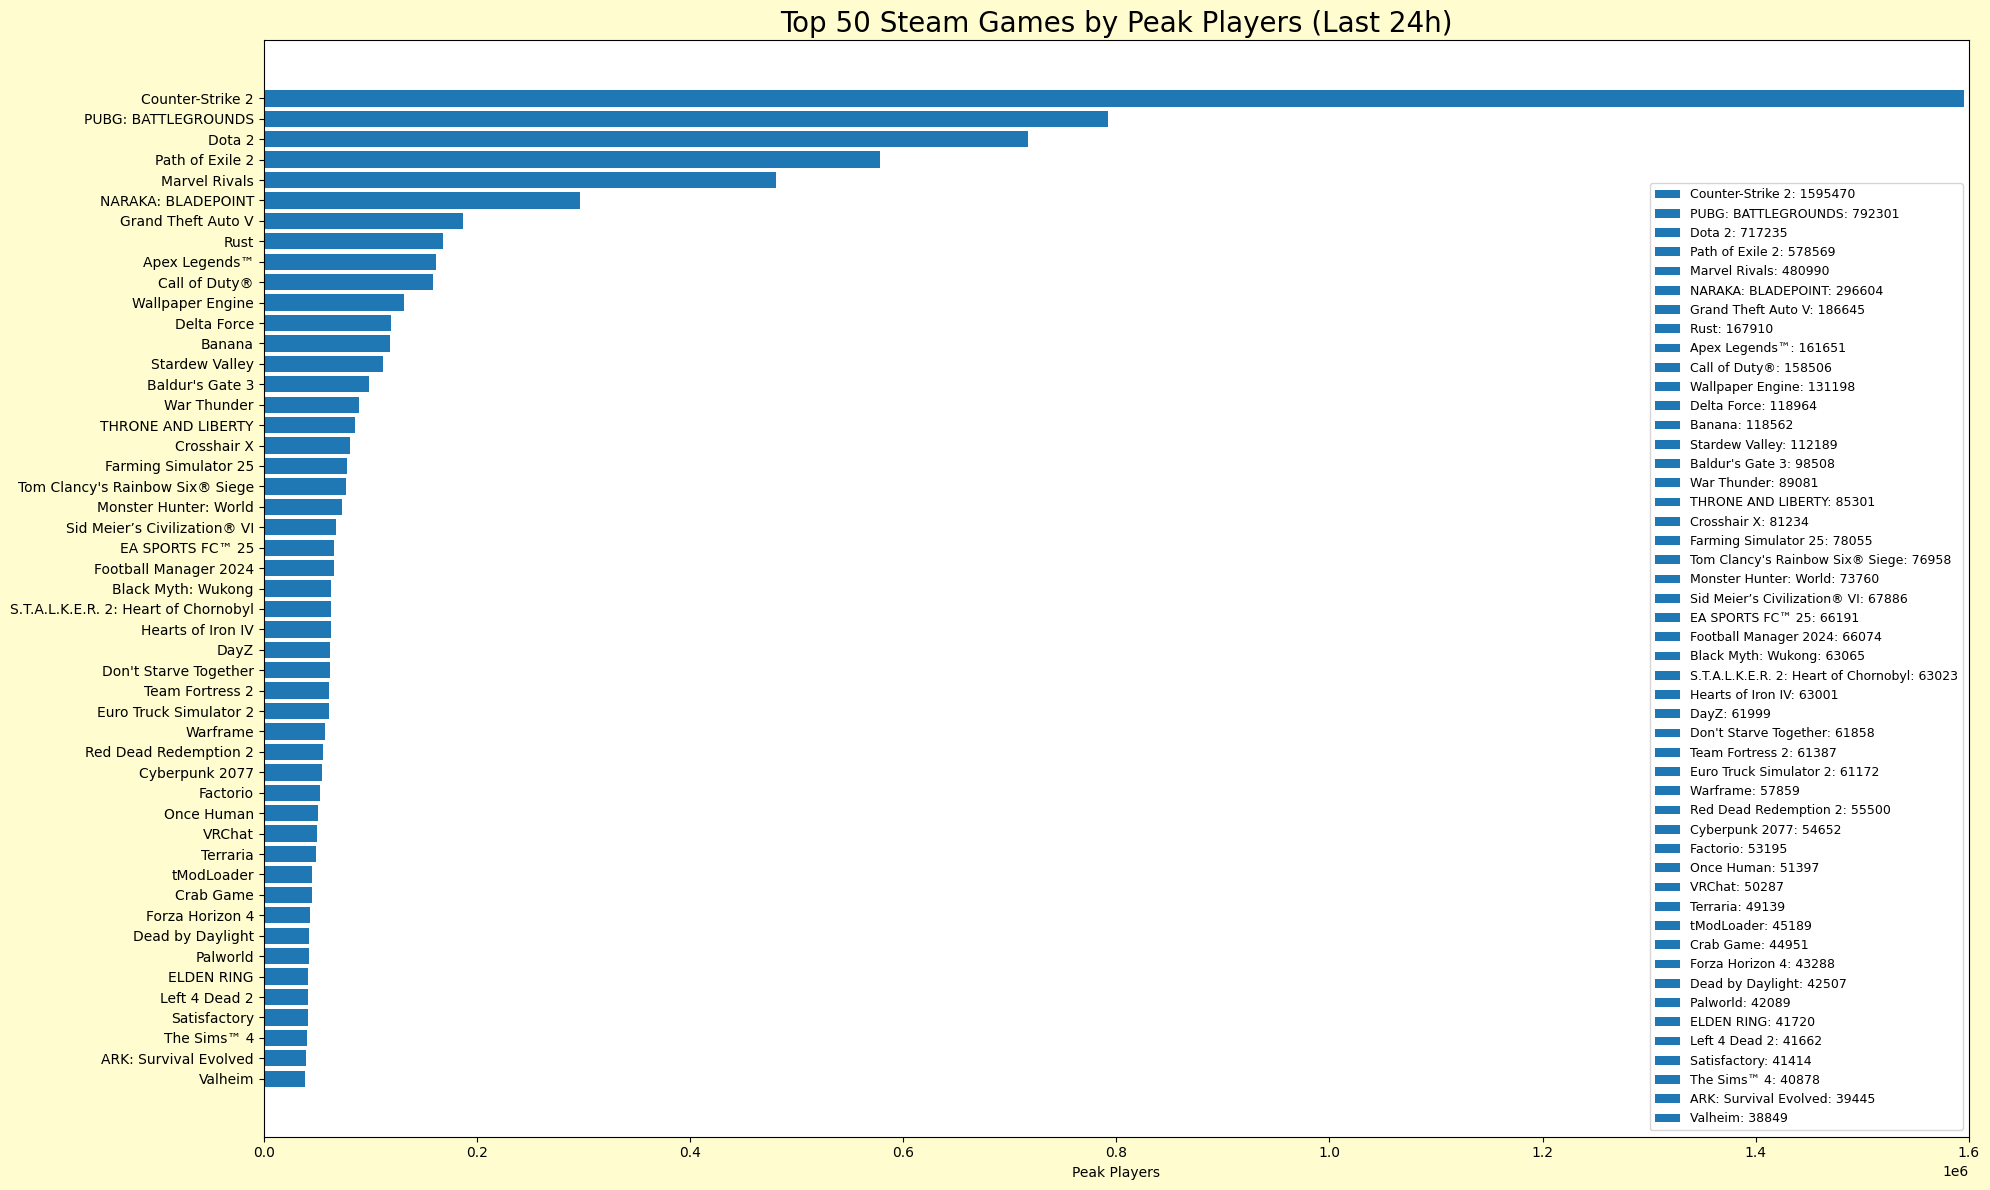

In [ ]:
steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:49]]

game_names = []
peak_players = []

for app_id, peak_all in top_50:
    app_details = steam.apps.search_games(str(app_id))
    print(app_details)
    game_name = app_details['apps'][0]['name']
    game_names.append(game_name)
    peak_players.append(peak_all)

fig, axs = plt.subplots(figsize=(20, 12))

bars = axs.barh(game_names, peak_players)

legend_labels = [f"{game_name}: {peak_player}" for game_name, peak_player in zip(game_names, peak_players)]

axs.legend(bars, legend_labels, fontsize=9)

axs.set_xlim(0, 1.6e6)
axs.set_xlabel('Peak Players')
axs.set_title('Top 50 Steam Games by Peak Players (Last 24h)', fontsize=20)
axs.invert_yaxis()

fig.patch.set_facecolor('#FFFDD0')

plt.tight_layout()
plt.savefig("top_50_games_24h.png")
plt.show()

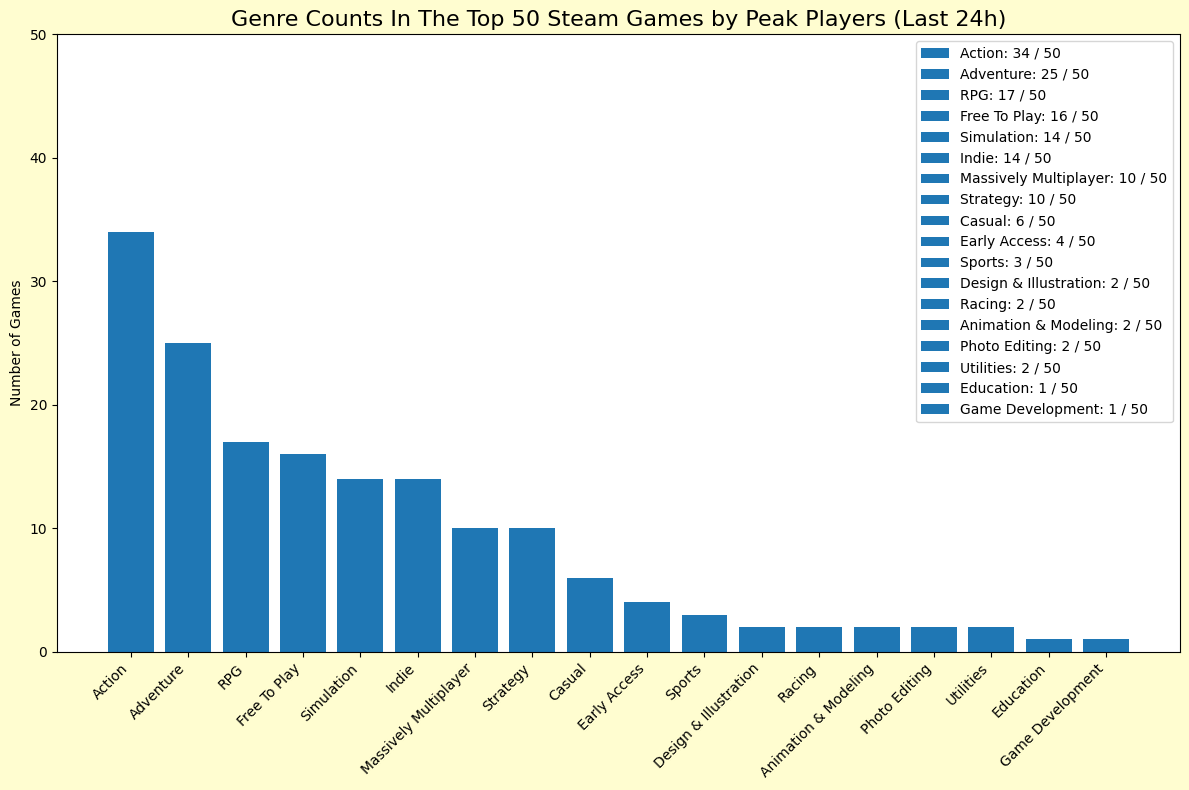

In [ ]:
steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:50]]

genres = []

for app_id, _ in top_50:
    app_details = steam.apps.get_app_details(str(app_id), filters='genres')
    genre_list = app_details[str(app_id)]['data']['genres']
    for genre in genre_list:
        genres.append(genre['description'])

genre_counts = {genre: genres.count(genre) for genre in set(genres)}
genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_counts = dict(genre_counts)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(genre_counts.keys(), genre_counts.values())
#Use this statement instead for colored bars
#bars = ax.bar(genre_counts.keys(), genre_counts.values(), color=plt.cm.Paired.colors[:len(genre_counts)])

legend_labels = [f"{genre}: {count} / 50" for genre, count in genre_counts.items()]

ax.legend(bars, legend_labels)

ax.set_xticks(range(len(genre_counts)))
ax.set_xticklabels(genre_counts.keys(), rotation=45, ha='right')

ax.set_ylabel('Number of Games')
ax.set_ylim(0, 50)
ax.set_title('Genre Counts In The Top 50 Steam Games by Peak Players (Last 24h)', fontsize=16)

fig.patch.set_facecolor('#FFFDD0')

plt.tight_layout()
plt.savefig("top_50_genres_24h.png")
plt.show()

In [14]:
file_path = '/content/drive/MyDrive/Csv/chart (6).csv'

data = pd.read_csv(file_path)


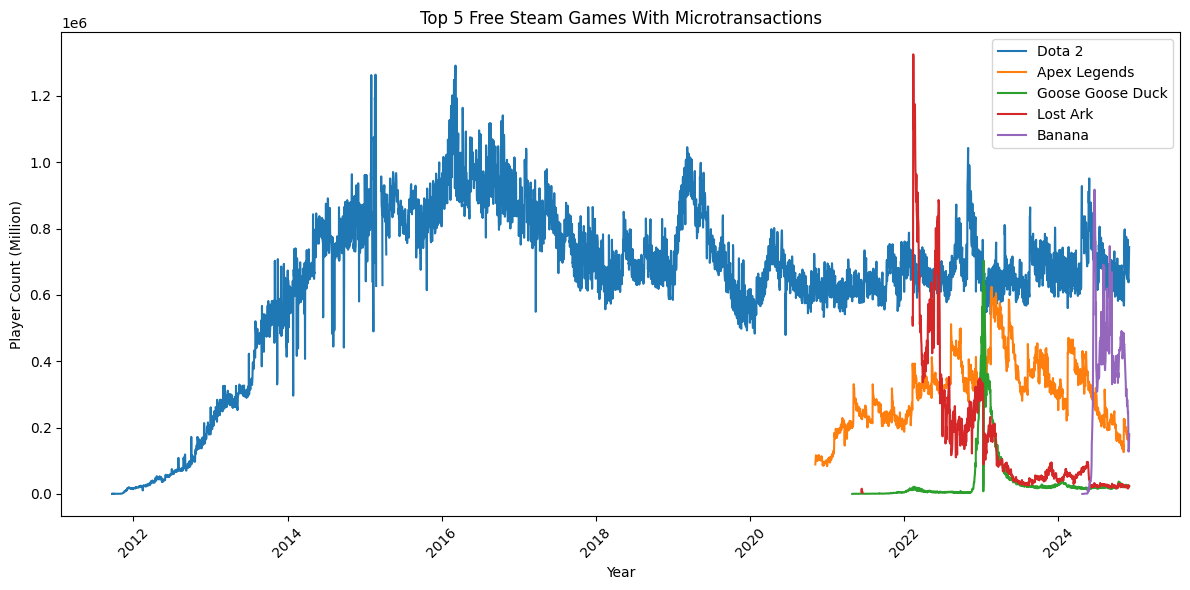

In [15]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

games = ['Dota 2', 'Apex Legends', 'Goose Goose Duck', 'Lost Ark', 'Banana']

for game in games:
  if game not in data.columns:
      print(f"Warning: '{game}' not found in the dataset. Skipping this game.")

plt.figure(figsize=(12, 6))
for game in games:
  if game in data.columns:
    plt.plot(data.index, data[game], label=game)

plt.xlabel('Year')
plt.ylabel('Player Count (Million)')
plt.title('Top 5 Free Steam Games With Microtransactions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
file_path = '/content/drive/MyDrive/Csv/chart (7).csv'

data = pd.read_csv(file_path)

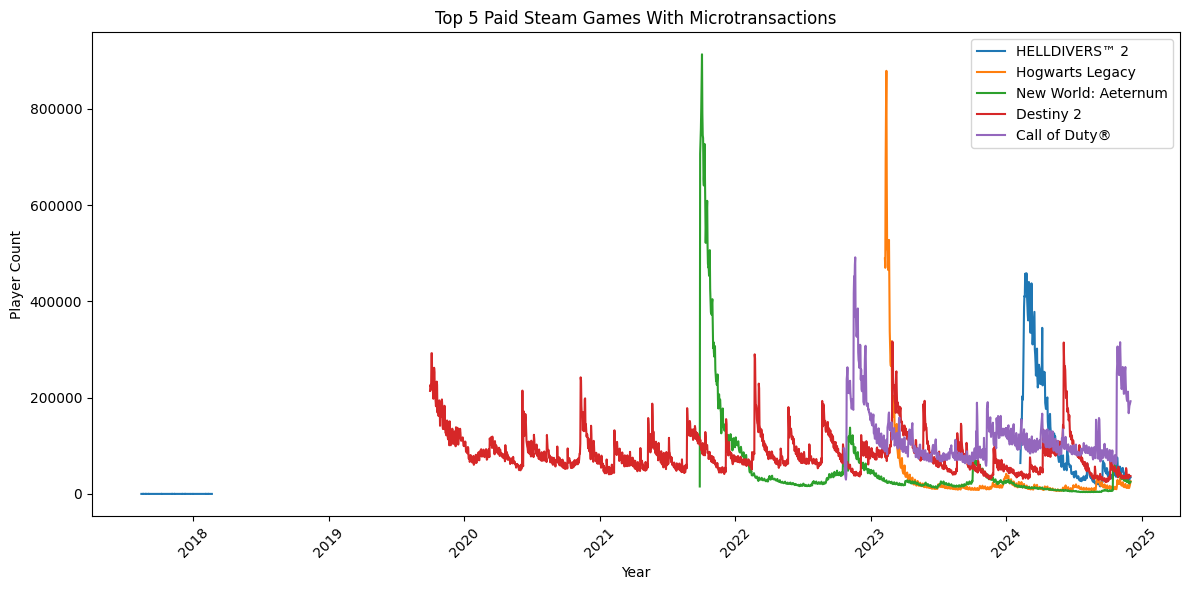

In [17]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

games = ['HELLDIVERS™ 2', 'Hogwarts Legacy', 'New World: Aeternum', 'Destiny 2', 'Call of Duty®']

for game in games:
  if game not in data.columns:
      print(f"Warning: '{game}' not found in the dataset. Skipping this game.")

plt.figure(figsize=(12, 6))
for game in games:
  if game in data.columns:
    plt.plot(data.index, data[game], label=game)

plt.xlabel('Year')
plt.ylabel('Player Count')
plt.title('Top 5 Paid Steam Games With Microtransactions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:10]]

game_names = ['PUBG: BATTLEGROUNDS', 'Black Myth: Wukong', 'Palworld', 'Counter-Strike 2', 'Lost Ark', 'Dota 2', 'Cyberpunk 2077', 'Elden Ring', 'Banana', 'New World: Aeternum']
peak_players = [3257248, 2415714, 2101867, 1818773, 1325305, 1295114, 1054388, 953426, 917272, 913634]

game_names_24h = []
peak_players_24h  = []

for app_id, peak_all in top_50:
    app_details = steam.apps.search_games(str(app_id))
    game_name = app_details['apps'][0]['name']
    game_names_24h.append(game_name)
    peak_players_24h.append(peak_all)

steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:100]]

genres = []

for app_id, _ in top_50:
    app_details = steam.apps.get_app_details(str(app_id), filters='genres')
    genre_list = app_details[str(app_id)]['data']['genres']
    for genre in genre_list:
        genres.append(genre['description'])

genre_counts = {genre: genres.count(genre) for genre in set(genres)}
genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_counts = dict(genre_counts)

all_time_data = pd.DataFrame({
    'Game Name': game_names,
    'All-Time Peak Players': peak_players
})

last_24h_data = pd.DataFrame({
    'Game Name': game_names_24h,
    '24-Hour Peak Players': peak_players_24h
})

merged_peaks = pd.merge(all_time_data, last_24h_data, on='Game Name', how='inner')

game_genres = {
    'PUBG: BATTLEGROUNDS': 'Battle Royale',
    'Black Myth: Wukong': 'Action',
    'Palworld': 'Adventure',
    'Counter-Strike 2': 'Shooter',
    'Lost Ark': 'MMORPG',
    'Dota 2': 'MOBA',
    'Cyberpunk 2077': 'RPG',
    'Elden Ring': 'RPG',
    'Banana': 'Casual',
    'New World: Aeternum': 'MMORPG'
}

merged_peaks['Genre'] = merged_peaks['Game Name'].map(game_genres)

genre_activity = merged_peaks.groupby('Genre').agg({
    'All-Time Peak Players': 'mean',
    '24-Hour Peak Players': 'mean'
}).reset_index()

genre_activity['Difference'] = genre_activity['All-Time Peak Players'] - genre_activity['24-Hour Peak Players']

print("Average Peak Player Differences by Genre:")
print(genre_activity)

Average Peak Player Differences by Genre:
           Genre  All-Time Peak Players  24-Hour Peak Players  Difference
0  Battle Royale              3257248.0              750493.0   2506755.0
1           MOBA              1295114.0              618358.0    676756.0
2        Shooter              1818773.0             1460230.0    358543.0


In [6]:
from scipy.stats import ttest_ind

free_file_path = '/content/drive/MyDrive/Csv/chart (6).csv'
paid_file_path = '/content/drive/MyDrive/Csv/chart (7).csv'

free_data = pd.read_csv(free_file_path)
free_data['DateTime'] = pd.to_datetime(free_data['DateTime'])
free_data.set_index('DateTime', inplace=True)

paid_data = pd.read_csv(paid_file_path)
paid_data['DateTime'] = pd.to_datetime(paid_data['DateTime'])
paid_data.set_index('DateTime', inplace=True)

free_games = ['Dota 2', 'Apex Legends', 'Goose Goose Duck', 'Lost Ark', 'Banana']
free_filtered = free_data[free_games].mean().reset_index()
free_filtered.columns = ['Game Name', 'Average Playtime']
free_filtered['Monetization Model'] = 'Free-to-Play'

paid_games = ['HELLDIVERS™ 2', 'Hogwarts Legacy', 'New World: Aeternum', 'Destiny 2', 'Call of Duty®']
paid_filtered = paid_data[paid_games].mean().reset_index()
paid_filtered.columns = ['Game Name', 'Average Playtime']
paid_filtered['Monetization Model'] = 'Paid'

merged_data = pd.concat([free_filtered, paid_filtered], ignore_index=True)

free_playtime = merged_data[merged_data['Monetization Model'] == 'Free-to-Play']['Average Playtime']
paid_playtime = merged_data[merged_data['Monetization Model'] == 'Paid']['Average Playtime']

t_stat, p_value = ttest_ind(free_playtime, paid_playtime)

print("Merged Dataset:")
print(merged_data)

print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference in playtime between free-to-play and paid games.")
else:
    print("Result: No significant difference in playtime between free-to-play and paid games.")

Merged Dataset:
             Game Name  Average Playtime Monetization Model
0               Dota 2     638224.750626       Free-to-Play
1         Apex Legends     303346.386425       Free-to-Play
2     Goose Goose Duck      39028.073115       Free-to-Play
3             Lost Ark     167607.556522       Free-to-Play
4               Banana     349385.161435       Free-to-Play
5        HELLDIVERS™ 2      71388.596567               Paid
6      Hogwarts Legacy      32989.532428               Paid
7  New World: Aeternum      51557.896730               Paid
8            Destiny 2      83609.371625               Paid
9        Call of Duty®     117859.272610               Paid

T-Test Results:
T-statistic: 2.24
P-value: 0.0551
Result: No significant difference in playtime between free-to-play and paid games.


In [7]:
steam = Steam(steam_api_key)

url = f"http://api.steampowered.com/ISteamChartsService/GetGamesByConcurrentPlayers/v1/?key={steam_api_key}"
response = requests.get(url)

data = response.json()

games = sorted(data['response']['ranks'], key=lambda x: x['peak_in_game'], reverse=True)

top_50 = [(game['appid'], game['peak_in_game']) for game in games[:100]]

genres = []

for app_id, _ in top_50:
    app_details = steam.apps.get_app_details(str(app_id), filters='genres')
    genre_list = app_details[str(app_id)]['data']['genres']
    for genre in genre_list:
        genres.append(genre['description'])

genre_counts = {genre: genres.count(genre) for genre in set(genres)}
genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_counts = dict(genre_counts)

top_50 = [(12345, 100000), (67890, 75000), (11223, 50000), (44556, 250000), (77889, 120000)]
game_genres = {
    12345: ['Action', 'Shooter'],
    67890: ['Action', 'Adventure'],
    11223: ['RPG'],
    44556: ['RPG', 'Strategy'],
    77889: ['Action']
}

data = []
for app_id, peak_players in top_50:
    for genre in game_genres.get(app_id, []):
        data.append({'AppID': app_id, 'Genre': genre, 'Peak Players': peak_players})

df = pd.DataFrame(data)

genre_variability = df.groupby('Genre')['Peak Players'].std().reset_index()
genre_variability = genre_variability.rename(columns={'Peak Players': 'Peak Player Variability'})

sorted_variability = genre_variability.sort_values(by='Peak Player Variability', ascending=False)

most_diverse = sorted_variability.iloc[0]
least_diverse = sorted_variability.iloc[-1]

print("Genre Variability:")
print(sorted_variability)

print(f"\nMost Diverse Genre: {most_diverse['Genre']} (Std Dev: {most_diverse['Peak Player Variability']:.2f})")
print(f"Least Diverse Genre: {least_diverse['Genre']} (Std Dev: {least_diverse['Peak Player Variability']:.2f})")

Genre Variability:
       Genre  Peak Player Variability
2        RPG            141421.356237
0     Action             22546.248764
1  Adventure                      NaN
3    Shooter                      NaN
4   Strategy                      NaN

Most Diverse Genre: RPG (Std Dev: 141421.36)
Least Diverse Genre: Strategy (Std Dev: nan)
